In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-food-wastage-dataset-2018-2024/global_food_wastage_dataset.csv


# "Analyzing and Predicting Food Wastage"

In [2]:
from IPython.display import Image, display


image_url = "https://i.hizliresim.com/hfcqdun.PNG" 
display(Image(url=image_url))


## What will you learn from this project?
* EDA 
* Categoric and Numeric Features
* Feature Engineering
* Data Standardization and Normalization
* Data Visualization
* ML Modelling and Evaluation


## Introduction
**Food wastage** is a growing global issue that affects not only the economy but also the environment and food security. According to the Food and Agriculture Organization (FAO), approximately one-third of all food produced is wasted, leading to significant financial losses and increased greenhouse gas emissions. This wastage occurs at various stages, including production, distribution, retail, and household consumption.

Understanding the patterns and causes of food wastage is crucial for developing effective strategies to minimize its impact. Data-driven approaches, such as machine learning and statistical analysis, provide valuable insights into food consumption behaviors and wastage trends. By leveraging these techniques, it is possible to predict food wastage and implement preventive measures, such as optimizing supply chain management and encouraging responsible consumption.

This study aims to analyze food wastage data, identify key factors contributing to waste, and develop predictive models to forecast future wastage levels. By doing so, we seek to provide actionable insights that can help businesses, policymakers, and consumers reduce unnecessary food loss and promote sustainable food management practices.


## Data Content  

This dataset contains information on food wastage across different countries over multiple years. It provides insights into the total food waste, economic loss, per capita waste, and household waste percentages. The dataset consists of **5,000 observations** and **8 features**, described as follows:  

- **Country**: The name of the country where the data was collected.  
- **Year**: The year in which the food wastage data was recorded.  
- **Food Category**: The type of food being analyzed in terms of wastage.  
- **Total Waste (Tons)**: The total amount of food waste in tons.  
- **Economic Loss (Million $)**: The financial impact of food wastage in millions of dollars.  
- **Avg Waste per Capita (Kg)**: The average food waste per person in kilograms.  
- **Population (Million)**: The total population of the country in millions.  
- **Household Waste (%)**: The percentage of total food waste that comes from households.  

This dataset can be used for **exploratory data analysis (EDA)**, **trend identification**, and **predictive modeling** to better understand food wastage patterns and develop effective strategies for waste reduction.


### Read and Analyze Data


In [3]:
data = pd.read_csv("/kaggle/input/global-food-wastage-dataset-2018-2024/global_food_wastage_dataset.csv")


In [4]:
df = data.copy()

In [5]:
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [6]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [7]:
### Missing Value and Unique Counts Analysis

In [8]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5000.0,2021.015600,1.999239,2018.00,2019.0000,2021.000,2023.0000,2024.00
Total Waste (Tons),5000.0,25061.780072,14245.119588,502.61,12783.7375,24865.220,37471.0350,49990.76
Economic Loss (Million $),5000.0,25039.703870,14620.236429,406.69,12612.4775,24428.155,37146.0375,59228.93
Avg Waste per Capita (Kg),5000.0,109.463970,51.933730,20.09,64.0500,110.080,154.5250,199.97
Population (Million),5000.0,706.606416,402.546464,11.29,350.6025,713.530,1057.2550,1399.97
Household Waste (%),5000.0,50.060890,11.596203,30.02,40.0125,50.295,60.1250,70.00


In [9]:
df.isnull().sum()

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

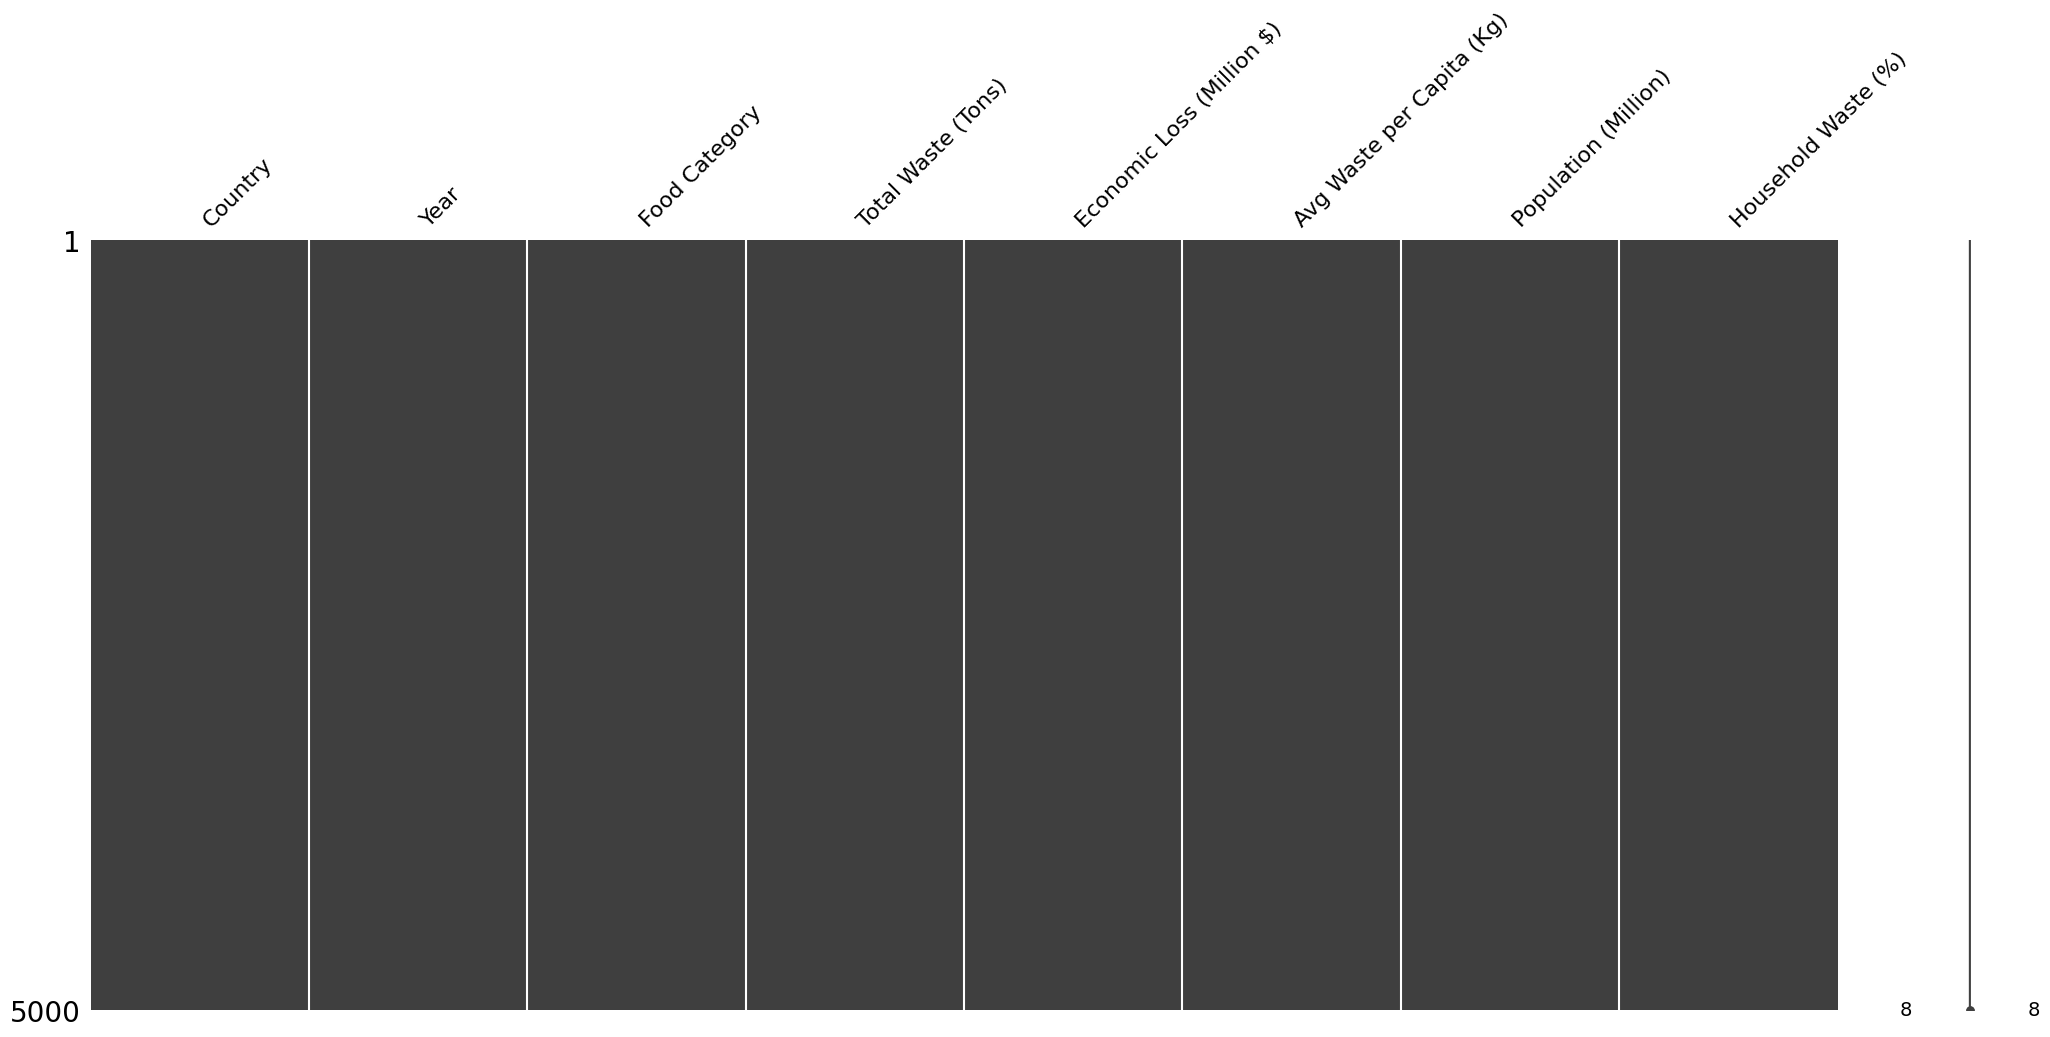

In [10]:
import missingno as msno
msno.matrix(df);

In [11]:
df["Country"].value_counts()

Country
Germany         287
Spain           274
China           262
Brazil          258
USA             257
India           257
Turkey          256
Canada          254
Italy           253
Mexico          251
South Africa    245
Indonesia       244
UK              242
South Korea     241
Japan           240
Saudi Arabia    239
France          239
Argentina       238
Russia          237
Australia       226
Name: count, dtype: int64

In [12]:
def func(df):
    for column in df.columns :
        print(f"Unique counts for column: {column}")
        print(df[column].unique())
        print()

In [13]:
func(df)

Unique counts for column: Country
['Australia' 'Indonesia' 'Germany' 'France' 'India' 'China' 'UK'
 'South Africa' 'Japan' 'USA' 'Brazil' 'Saudi Arabia' 'Italy' 'Spain'
 'Mexico' 'Argentina' 'Canada' 'South Korea' 'Russia' 'Turkey']

Unique counts for column: Year
[2019 2022 2023 2024 2018 2021 2020]

Unique counts for column: Food Category
['Fruits & Vegetables' 'Prepared Food' 'Dairy Products' 'Beverages'
 'Meat & Seafood' 'Grains & Cereals' 'Frozen Food' 'Bakery Items']

Unique counts for column: Total Waste (Tons)
[19268.63  3916.97  9700.16 ... 20640.96 26566.64  8860.27]

Unique counts for column: Economic Loss (Million $)
[18686.68  4394.48  8909.16 ... 22485.33 29357.57  7360.38]

Unique counts for column: Avg Waste per Capita (Kg)
[ 72.69 192.52 166.94 ...  21.04 197.14  51.5 ]

Unique counts for column: Population (Million)
[  87.59 1153.99 1006.11 ...   16.13 1086.17  879.67]

Unique counts for column: Household Waste (%)
[53.64 30.61 48.08 ... 60.1  31.78 31.23]



## Analysis and Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
!pip install geopandas matplotlib plotly

<ipython-input-16-f1769c1c46ca>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1400x800 with 0 Axes>

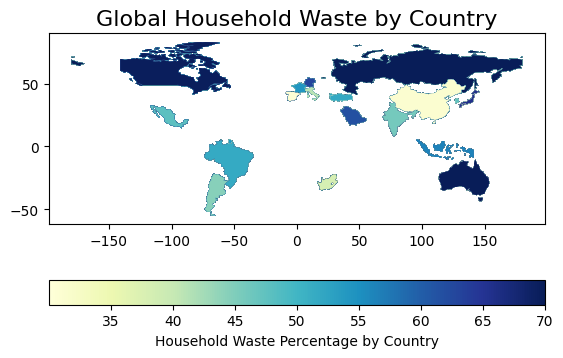

In [16]:
import geopandas as gpd


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(df.set_index('Country'))

plt.figure(figsize=(14, 8))
merged.plot(column='Household Waste (%)', cmap='YlGnBu', legend=True,
            legend_kwds={'label': "Household Waste Percentage by Country",
                         'orientation': "horizontal"})
plt.title("Global Household Waste by Country", fontsize=16)
plt.show()


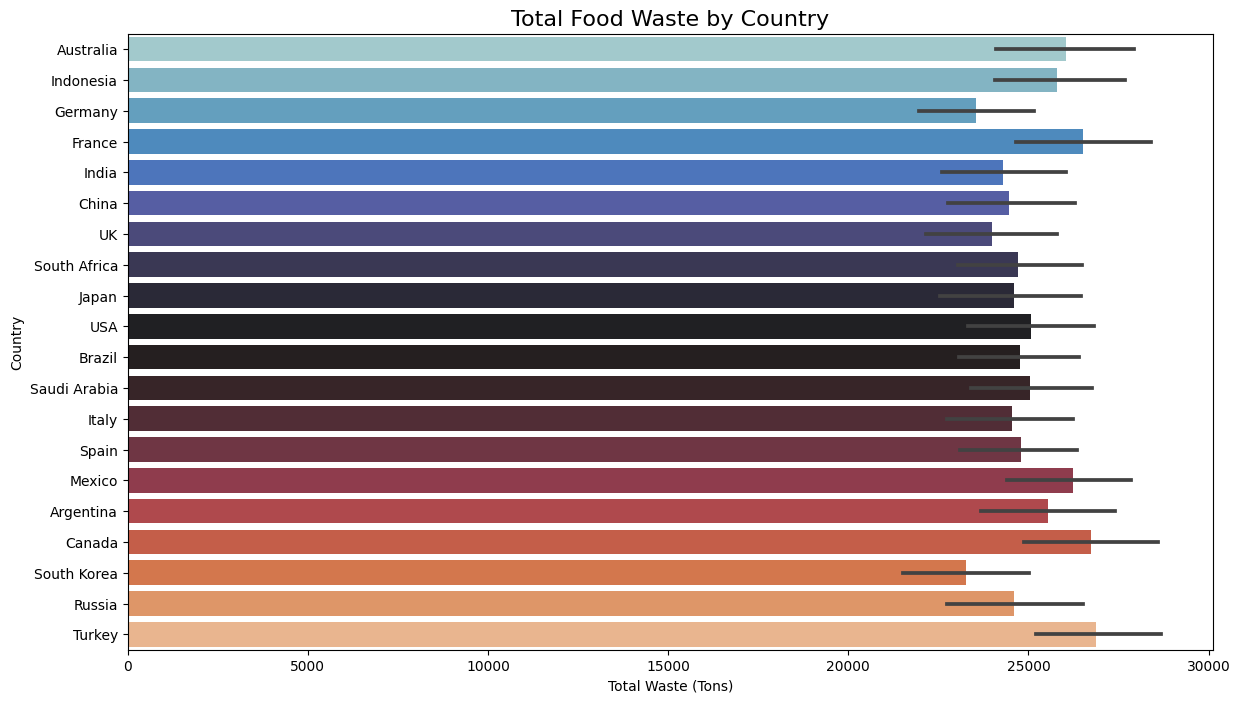

In [17]:
plt.figure(figsize=(14,8))
sns.barplot(y="Country", x="Total Waste (Tons)", data=df, palette="icefire")
plt.title("Total Food Waste by Country", fontsize=16)
plt.xlabel("Total Waste (Tons)")  
plt.ylabel("Country") 
plt.show()


<ipython-input-18-7fa2c441dfda>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="Total Waste (Tons)", data=df, marker="o",ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


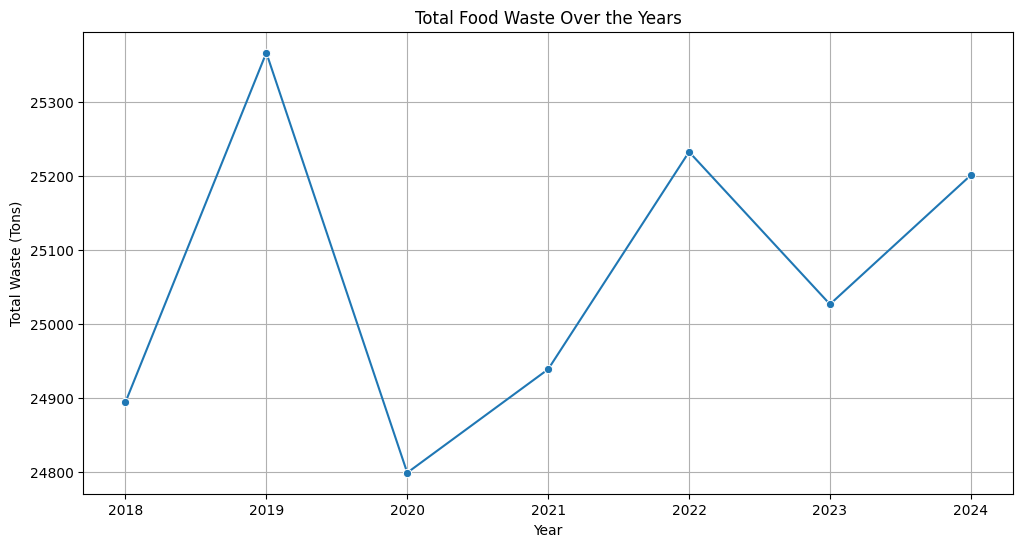

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Total Waste (Tons)", data=df, marker="o",ci=None)
plt.title("Total Food Waste Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Waste (Tons)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


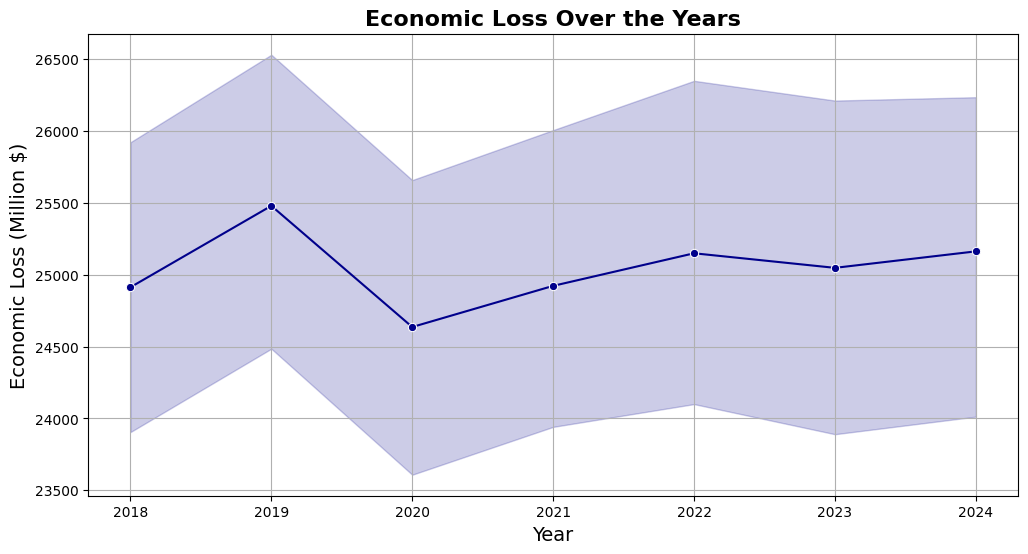

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Economic Loss (Million $)", data=df, marker="o", color="darkblue")

plt.title("Economic Loss Over the Years", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Economic Loss (Million $)", fontsize=14)
plt.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


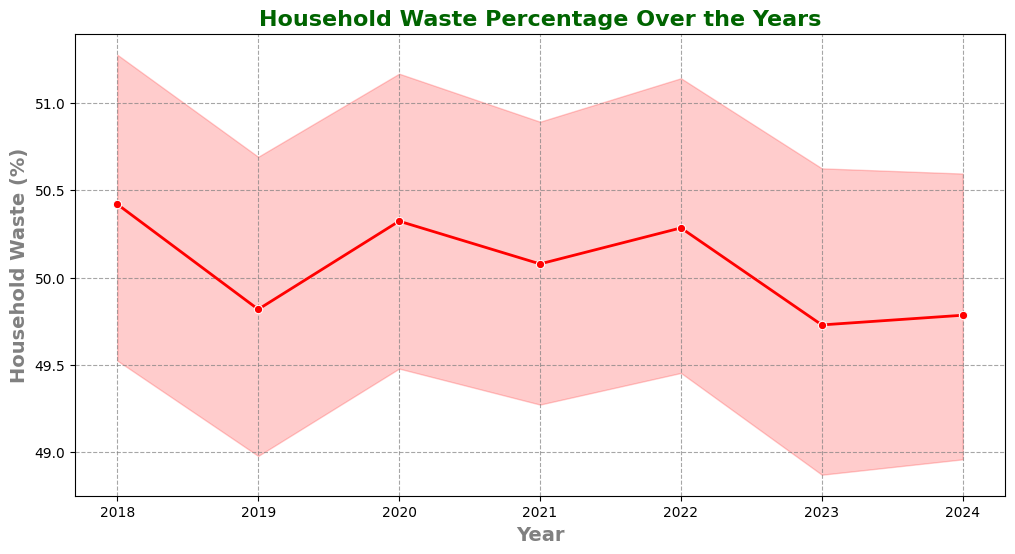

In [20]:
plt.figure(figsize=(12, 6))  # Grafik boyutunu ayarladık

sns.lineplot(
    x="Year", 
    y="Household Waste (%)", 
    data=df, 
    marker="o", 
    color="red", 
    linewidth=2,  

)


plt.title("Household Waste Percentage Over the Years", fontsize=16, fontweight="bold", color="darkgreen")
plt.xlabel("Year", fontsize=14, fontweight="bold", color="gray")
plt.ylabel("Household Waste (%)", fontsize=14, fontweight="bold", color="gray")


plt.grid(True, linestyle="--", alpha=0.7, color="gray")


plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


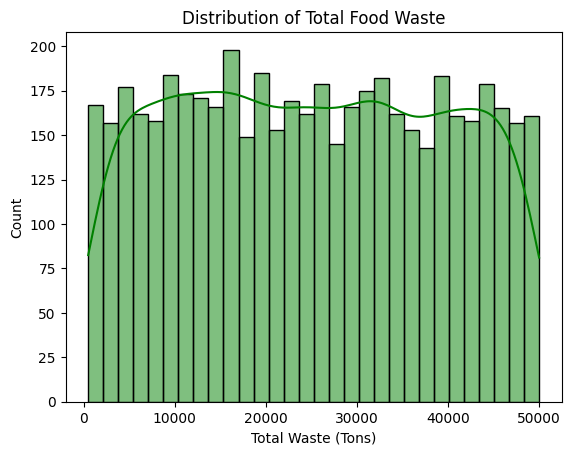

In [21]:
sns.histplot(df["Total Waste (Tons)"], bins=30, kde=True, color="g")
plt.title("Distribution of Total Food Waste")
plt.show()


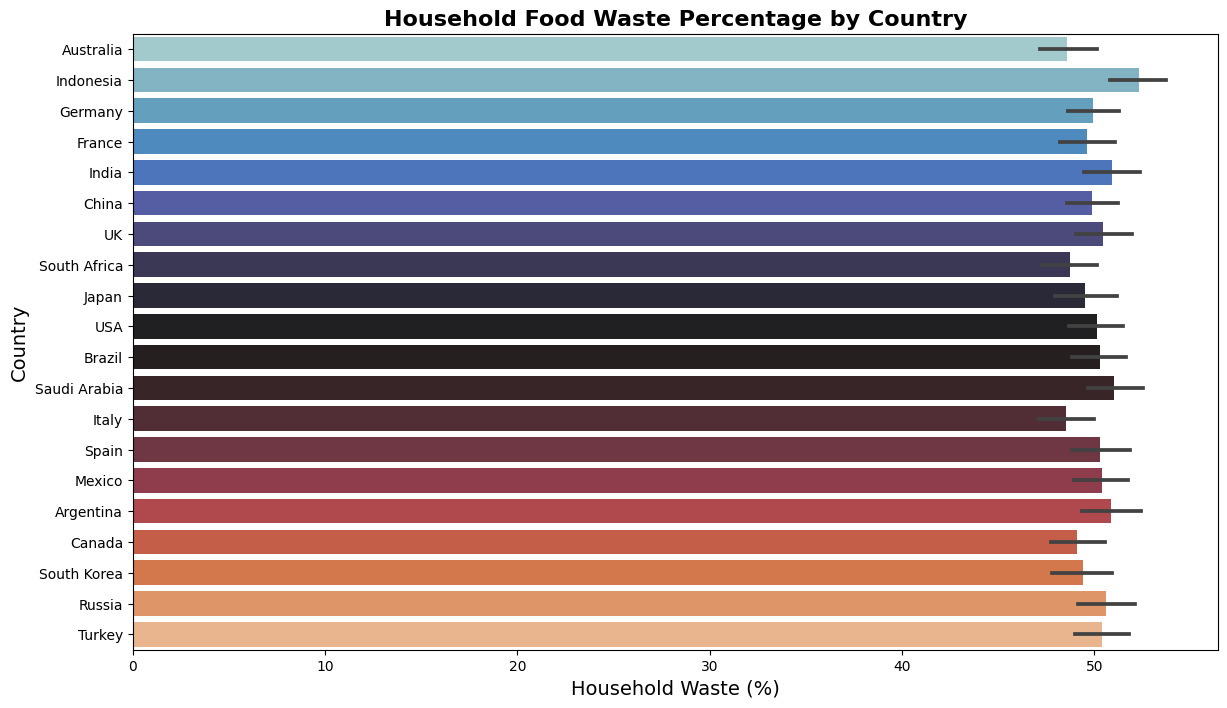

In [22]:
plt.figure(figsize=(14,8)) 


sns.barplot(
    y="Country", 
    x="Household Waste (%)", 
    data=df, 
    palette="icefire", 
)

plt.title("Household Food Waste Percentage by Country", fontsize=16, fontweight="bold")
plt.xlabel("Household Waste (%)", fontsize=14)
plt.ylabel("Country", fontsize=14)

# Grafiği göster
plt.show()


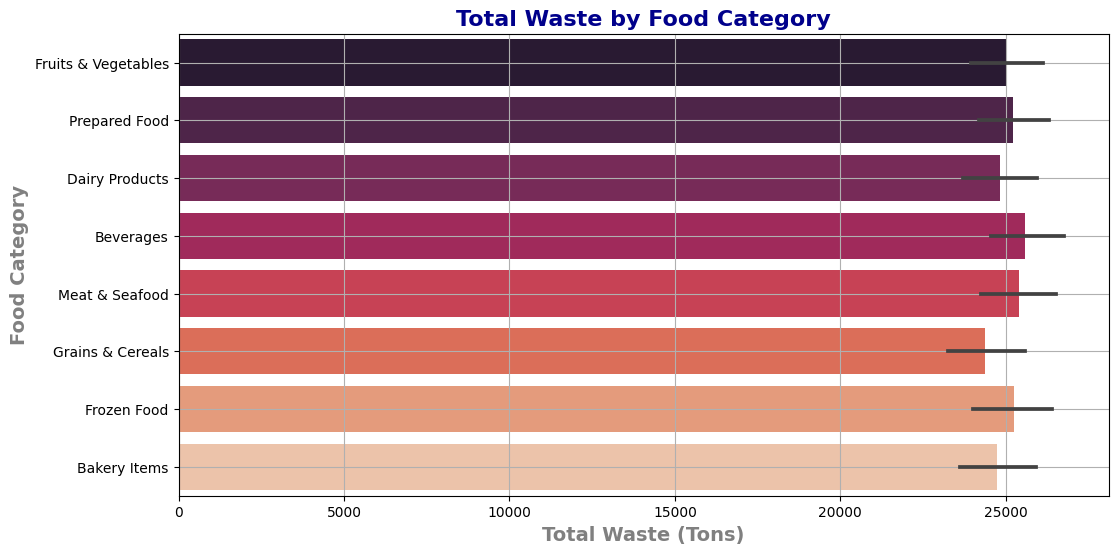

In [23]:
plt.figure(figsize=(12, 6))  


sns.barplot(
    y="Food Category", 
    x="Total Waste (Tons)", 
    data=df, 
    palette="rocket", 
)

# Başlık ve etiketler
plt.title("Total Waste by Food Category", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Total Waste (Tons)", fontsize=14, fontweight="bold", color="gray")
plt.ylabel("Food Category", fontsize=14, fontweight="bold", color="gray")


plt.grid(True)
plt.show()

## Outlier Analysis

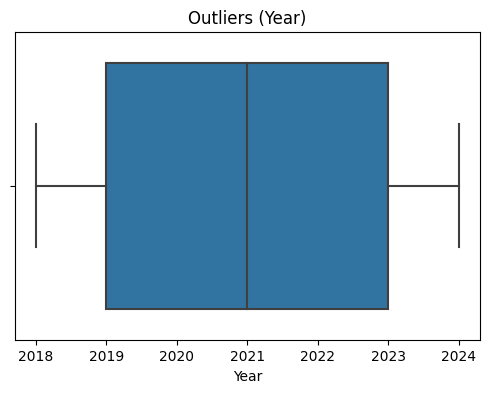

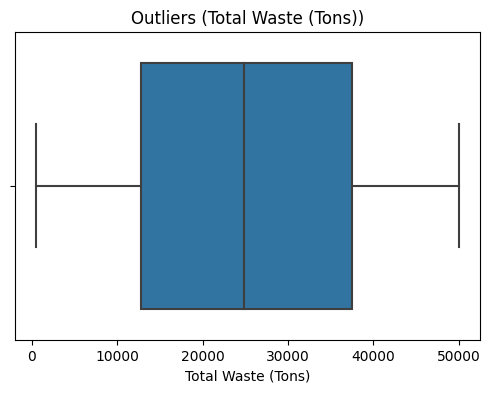

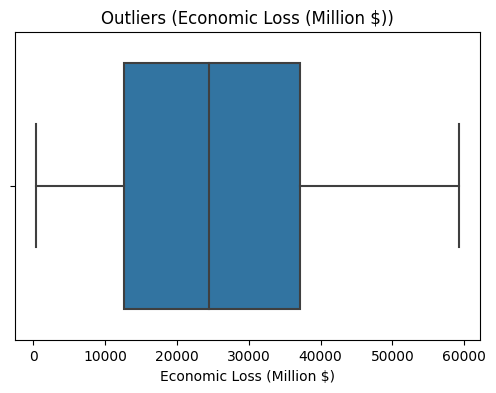

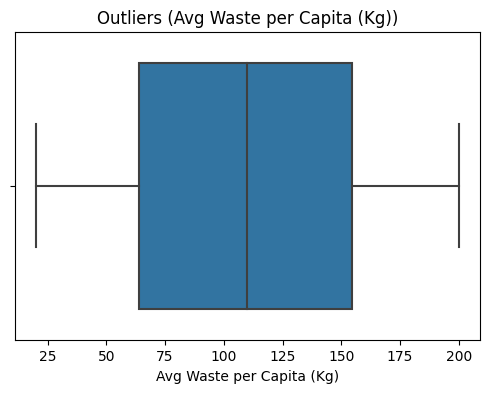

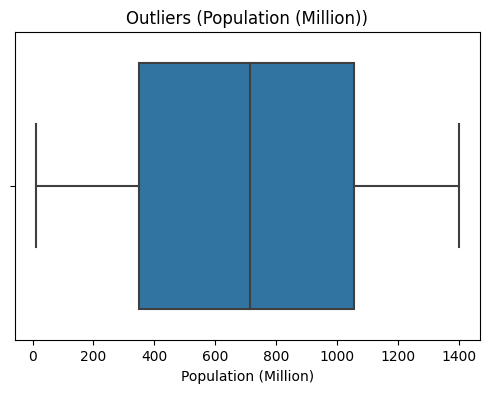

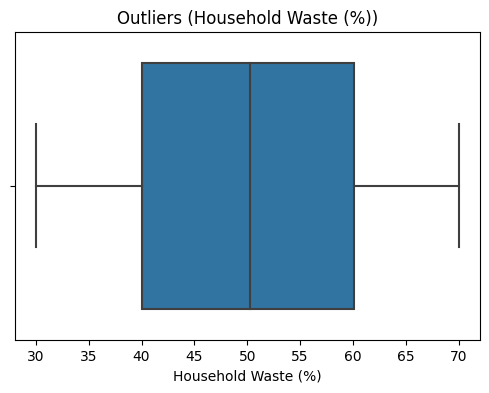

Outliers in the Year column: []
Outliers in the Total Waste (Tons) column: []
Outliers in the Economic Loss (Million $) column: []
Outliers in the Avg Waste per Capita (Kg) column: []
Outliers in the Population (Million) column: []
Outliers in the Household Waste (%) column: []


In [24]:
def detect_outliers(df, method="IQR", threshold=1.5):
    outlier_dict = {} 
    
    for col in df.select_dtypes(include=[np.number]):  
        if method == "IQR":
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        elif method == "z-score":
            mean = df[col].mean()
            std = df[col].std()
            z_scores = (df[col] - mean) / std
            outliers = df[np.abs(z_scores) > threshold]

        else:
            raise ValueError("Invalid method! You should use 'IQR' or 'z-score'.")

        outlier_dict[col] = outliers[col].values

        # Visualize outliers
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Outliers ({col})")
        plt.show()

    return outlier_dict

outliers = detect_outliers(df, method="IQR", threshold=1.5)

for key, values in outliers.items():
    print(f"Outliers in the {key} column: {values}")


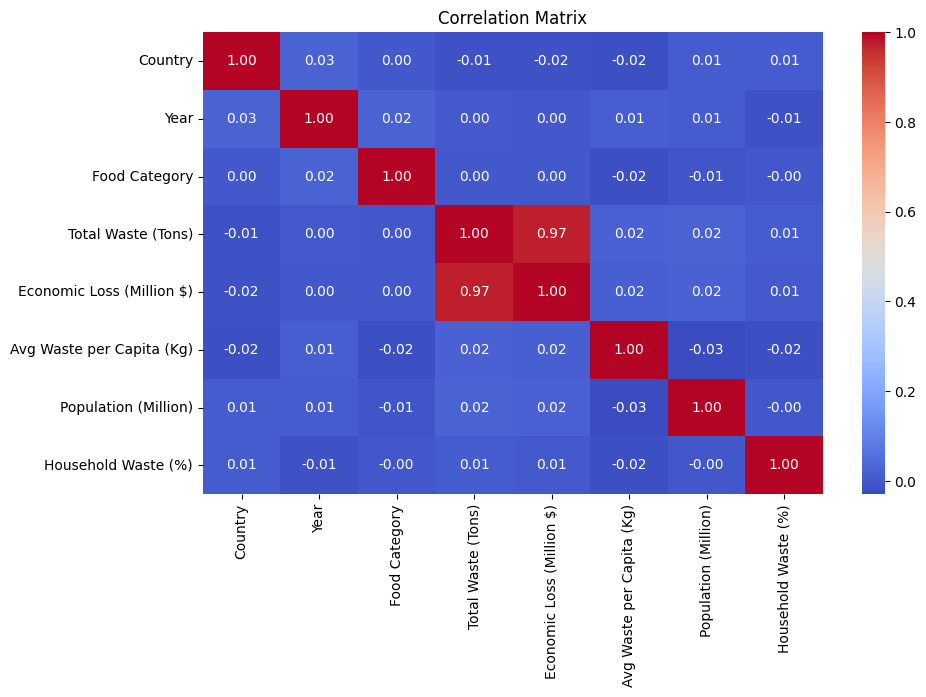

In [25]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()


for col in df.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])


plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [26]:
df

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
...,...,...,...,...,...,...,...,...
4995,France,2021,Beverages,47524.74,48058.40,77.41,1087.46,39.73
4996,Australia,2021,Beverages,32337.72,32705.08,194.35,1336.32,64.83
4997,China,2018,Meat & Seafood,20640.96,22485.33,21.04,16.13,31.23
4998,Australia,2021,Beverages,26566.64,29357.57,197.14,1086.17,69.95


## ML Modelling , Tuning and Evaluation


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import xgboost as xgb

In [28]:

X = df.drop('Total Waste (Tons)', axis=1)
y = df['Total Waste (Tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# One Hot Encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [30]:
# Standart Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
import xgboost as xgb

xg_model = xgb.XGBRegressor(random_state=42)
xg_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [32]:
# XGBoost modelinin test verisiyle tahmin yapma
y_pred_xg = xg_model.predict(X_test_scaled)

# MSE ve R² hesaplama
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"XGBoost MSE: {mse_xg}")
print(f"XGBoost R²: {r2_xg}")


XGBoost MSE: 10217576.57803775
XGBoost R²: 0.9527776196580016


In [33]:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest MSE: 9528694.980250755
Random Forest R²: 0.9559614107040333
